In [1]:
#%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [68]:
import ompy as om
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [101]:
mat = om.Matrix.from_path("./120Sn_raw_without_bg.m").loc['900keV':'9.4MeV', '250keV':'9.4MeV']

(<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f45c57d7010>,
  <matplotlib.colorbar.Colorbar at 0x7f45c57d7a60>))

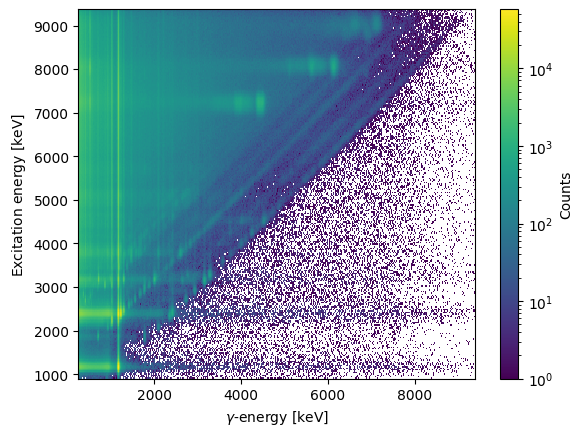

In [88]:
mat.plot()

In [4]:
resp = om.response.Response.from_db('Oscar2020')

Version mismatch when loading /home/erdos/gits/ompydock/data/response/OSCAR2020/data/compton.npz: 2.0.0.dev0+b7d23b4 != 2.0.0.dev0+dad79cc
Version mismatch when loading /home/erdos/gits/ompydock/data/response/OSCAR2020/compton.npz: 2.0.0.dev0+b7d23b4 != 2.0.0.dev0+dad79cc


In [89]:
oslo = om.detector.Oslo.from_response(resp)
m = oslo.cut_at_resolution(mat)

(<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f45d3d8b790>,
  <matplotlib.colorbar.Colorbar at 0x7f45d3d8af50>))

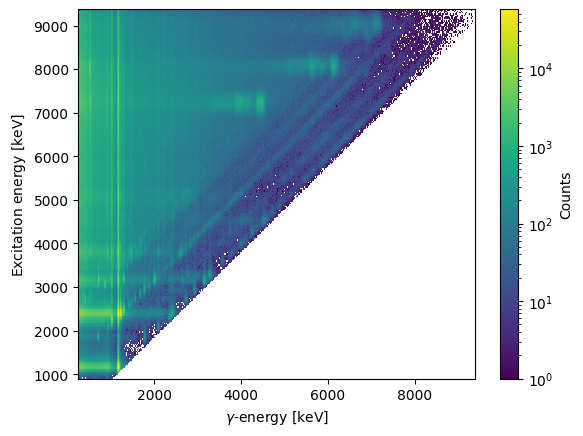

In [90]:
m.plot()

In [27]:
unf = om.unfolding.Guttormsen.from_response(resp, m)
res = unf.unfold(m)

100%|██████████████████████████████| 265/265 [00:02<00:00, 124.25it/s]


<IPython.core.display.Javascript object>


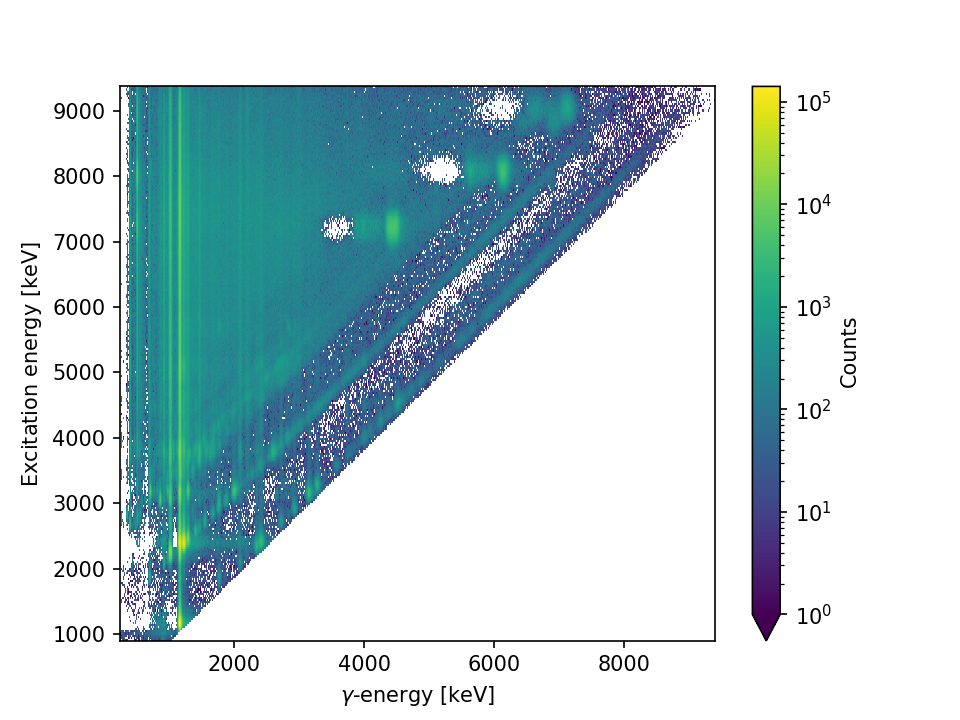

(<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fd9b48acee0>,
  <matplotlib.colorbar.Colorbar at 0x7fd9ac854ca0>))

In [31]:
unfolded = res.best()
unfolded[unfolded < 0] = 0
unfolded.plot(scale='log', vmin=1)

In [49]:
fg = om.firstgeneration.FirstGeneration()
fgmat = fg(unfolded)

H (265, 1144)
W (265, 1144)
N (265, 265)


ValueError: operands could not be broadcast together with shapes (265,1144) (265,265) 

In [2]:
import os; print(os.environ.get('QT_API'))

None


In [6]:
import matplotlib
matplotlib.use('QtAgg')

In [7]:
%matplotlib qt

In [9]:
clicker = om.Clicker(mat)
clicker.start()

(2007.86, 1919.44) --> (2155.25, 2232.61)
The buttons you used were: 1 1
{'fill': False, 'edgecolor': 'red', 'facecolor': 'blue'}
Rectangle(xy=(2000, 1888), width=144, height=288, angle=0)
(2371.01, 2259.24) --> (2499.17, 2606.65)
The buttons you used were: 1 1
{'fill': False, 'edgecolor': 'red', 'facecolor': 'blue'}
Rectangle(xy=(2368, 2240), width=120, height=320, angle=0)
(2264.20, 2174.29) --> (2405.18, 2524.23)
The buttons you used were: 1 1
{'fill': False, 'edgecolor': 'red', 'facecolor': 'blue'}
Rectangle(xy=(2264, 2144), width=128, height=320, angle=0)
(2620.93, 2587.63) --> (2811.05, 2885.59)
The buttons you used were: 1 1
{'fill': False, 'edgecolor': 'red', 'facecolor': 'blue'}
Rectangle(xy=(2616, 2560), width=184, height=288, angle=0)
(2843.09, 2760.06) --> (3011.85, 3087.18)
The buttons you used were: 1 1
{'fill': False, 'edgecolor': 'red', 'facecolor': 'blue'}
Rectangle(xy=(2840, 2752), width=160, height=288, angle=0)
(1959.11, 3029.19) --> (2086.23, 3396.14)
The buttons y

In [6]:
clicker = om.Clicker(mat)
clicker.load_areas('areas')

In [11]:
clicker.areas[0].area.plot()

(<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f33983ad3f0>,
  <matplotlib.colorbar.Colorbar at 0x7f33983ac730>))

In [12]:
mx, my = [], []
sx, sy = [], []
for area in clicker.areas:
    res = area.fit_minuit()
    sx.append(res.values[2])
    sy.append(res.values[3])
    mx.append(res.values[0])
    my.append(res.values[1])
import pandas as pd
points = pd.DataFrame(dict(mx=mx, my=my, sx=sx, sy=sy))

In [13]:
ax = points.plot(x='mx', y='sx', ls='', marker='x')
oslo = om.detector.Oslo()
sx2 = oslo.egdetector._sigma(points.mx)
ax.plot(mx, sx2, 'rx')

In [65]:
ax = points.plot(x='my', y='sy', ls='', marker='x')
sy2 = oslo.exdetector._sigma(points.my)
#print(points.my)
#ax.plot(my, sy2, 'rx')

In [7]:
from iminuit import cost, Minuit
# faster than scipy.stats functions
from numba_stats import truncnorm, truncexpon, norm, expon, uniform
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvnorm

In [26]:
?uniform.cdf

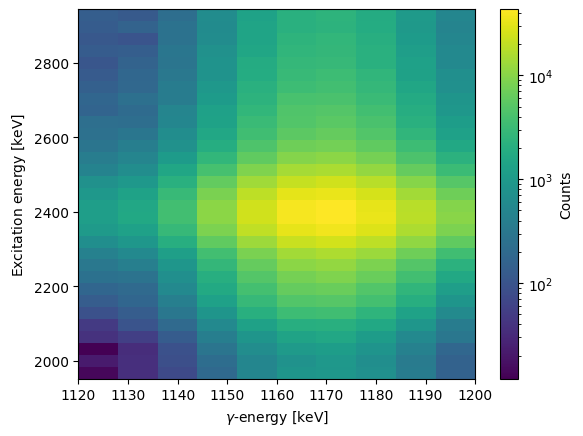

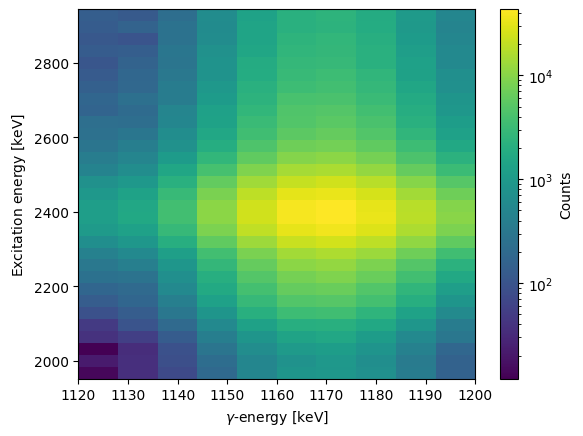

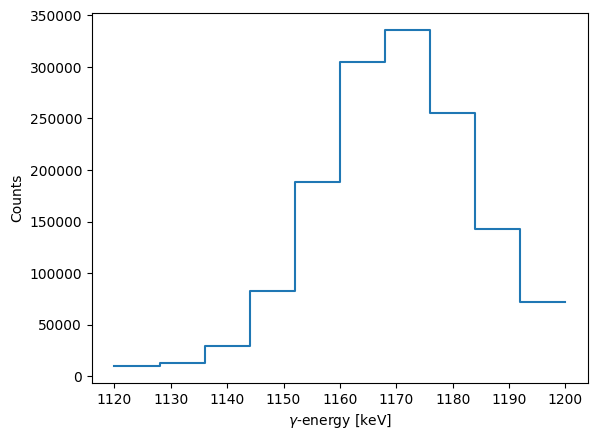

In [36]:
area = clicker.areas[5]
ax, _ = area.area.plot()
#ax.axhline(4550.0, color='r')
#v = area.area.loc[7, 3100.0:]
#w = area.area.loc[4400.0:, 4450.0:4650.0] # -1
#w = area.area.loc[3000.0:3400.0, 3100.0:3200.0] # 0
#w = area.area # -2
w = area.area
w.plot()
v = w.sum('Ex')
v.plot()
x, y = v.unpack()
(mx, _, sx, _, A), (mxb, _, sxb, _, Ab) = area.initial_heuristic()
A = sum(y)
sxb = (1, 100)

In [37]:
def cdf(x, mu, sigma):
    return norm.cdf(x, mu, sigma)
def integral(x, mu, sigma, A, B):
    return A*norm.cdf(x, mu, sigma) + B * uniform.cdf(x, x[0], x[-1])
def pdf(x, mu, sigma, A, B):
    return A*norm.pdf(x, mu, sigma) + B * uniform.pdf(x, x[0], x[-1])
dx = x[1] - x[0]
z = np.append(x, x[-1] + dx) + dx/2
c = cost.ExtendedBinnedNLL(y, z, integral)

m = Minuit(c, mu=mx, sigma=sx, A=1.0, B=1.0)
m.limits["sigma"] = sxb
m.limits['mu'] = mxb
m.limits['A', 'B'] = (0, 10*sum(y))
m.scan()
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2684 (chi2/ndof = 447.3)   │             Nfcn = 1165              │
│ EDM = 1.98e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │1.174766e3 │0.000013e3 │-0.000013e3 │ 0.000013e3 │  1120   │  1192   │       │
│ 1 │ sigma │  13.119   │   0.013   │   -0.013   │   0.013    │    1    │   100   │       │
│ 2 │ A     │ 1.3618e6  │ 0.0015e6  │ -0.0014e6  │  0.0015e6  │    0    │1.43431e+07│       │
│ 3 │ B     │  1.357e6  │  0.012e6  │  -0.013e6  │  0.013e6   │    0    │1.43431e+07│       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │           A           │           B           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.013   │   0.013   │  -0.013   │   0.013   │  -1.4e3   │   1.5e3   │ -0.012e6  │  0.013e6  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────────────────────────┐
│       │        mu     sigma         A         B │
├───────┼─────────────────────────────────────────┤
│    mu │  0.000164  1.18e-05     0.106      5.45 │
│ sigma │  1.18e-05  0.000173      7.51     -88.1 │
│     A │     0.106      7.51  2.11e+06 -9.77e+06 │
│     B │      5.45     -88.1 -9.77e+06  1.49e+08 │
└───────┴─────────────────────────────────────────┘

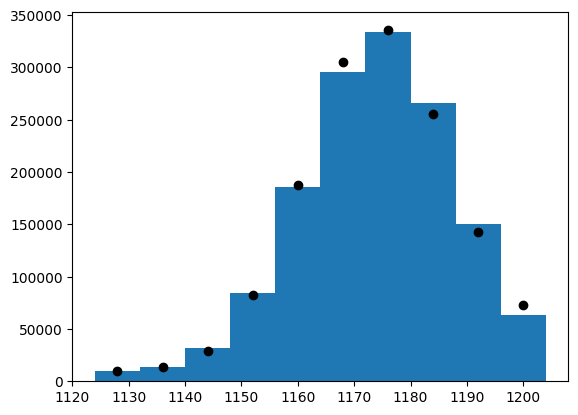

In [38]:
m.visualize()

In [39]:
oslo.egdetector.sigma(m.values['mu'])

Magnitude,[13.192421824802617]
Units,kiloelectron_volt


{'marker': 'o', 'ls': 'none', 'capsize': 2, 'capthick': 0.5, 'ms': 3, 'lw': 1}


<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Counts'>

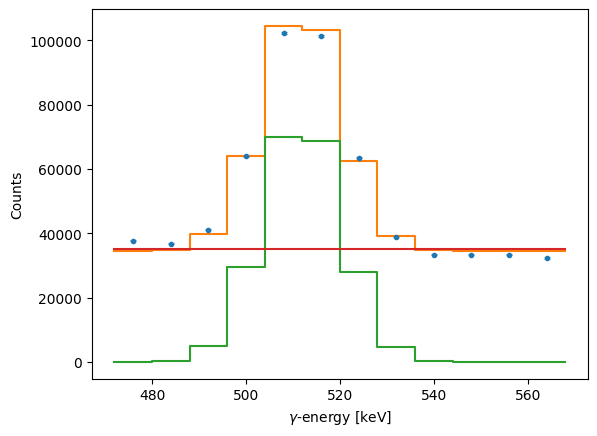

In [26]:
fig, ax = plt.subplots()
v.plot(ax=ax, kind='poisson')
u = v.clone(values=8*pdf(v.X + dx, *m.values))
u.plot(ax=ax)
v.clone(values=8*m.values[2]*norm.pdf(v.X+dx, *m.values[:2])).plot(ax=ax)
v.clone(values=8*m.values[3]*uniform.pdf(v.X+dx, v.X[0], v.X[-1])).plot(ax=ax)

In [12]:
pdf(v.X, *m.values)

array([ 25.71648942,  28.50984782,  32.76310862,  38.81340571,
        46.8271131 ,  56.66168072,  67.75913019,  79.1266034 ,
        89.44453536,  97.30282421, 101.51267423, 101.40063511,
        96.98494288,  88.97066246,  78.56541066,  67.18189512,
        56.12788741,  46.37570631,  38.46092583,  32.5074359 ,
        28.33688391,  25.60705305,  23.93357565,  22.97107576,
        22.45101786])

In [122]:
oslo.egdetector.sigma('3.1MeV')
oslo.egdetector.sigma('4.5378MeV')

26.966673146977573 <Unit('kiloelectron_volt')>

In [40]:
print(m.values)
print(np.sqrt(np.diag(m.covariance)))

<ValueView mu=1174.765875559275 sigma=13.11883709463107 A=1361806.4783417394 B=1357231.0194525423>
[1.28125587e-02 1.31354496e-02 1.45359959e+03 1.22002563e+04]


In [83]:
mx = np.array([3161.12, 4532.48, 515.83, 1174.76])
smx = np.array([1.8e-1, 6.1681e-1, 3.16e-2, 1.28e-2])
sx = np.array([22.87, 33.87, 8.50, 13.1188])
ssx = np.array([3.204e-1, 9.136e-1, 3.45e-2, 1.313e-2])
i = np.argsort(mx)
mx = mx[i]
smx = smx[i]
sx = sx[i]
ssx = ssx[i]

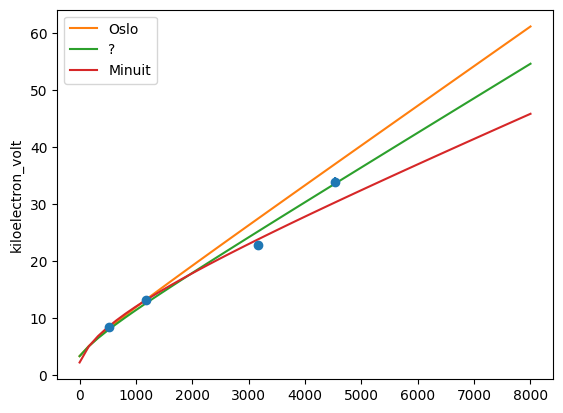

In [87]:
fig, ax = plt.subplots()
ax.errorbar(mx, sx, xerr=smx, yerr=ssx, ls='none', marker='o')
X = np.linspace(0, 8000)
ax.plot(X, oslo.egdetector.sigma(X), label='Oslo')
ax.plot(X, sigma(X, 60.63, 0.458, 2e-4), label='?')
ax.plot(X, sigma(X, *m.values), label='Minuit')
ax.legend()

In [56]:
oslo.egdetector.func

FWHMInterpolation(60.63, 0.458, 0.0002655, 1.0)

In [73]:
2e-4

0.0002

In [85]:
FWHM_TO_SIGMA = 1 / (2 * np.sqrt(2 * np.log(2)))

@njit
def sigma(X, a0, a1, a2):
    return FWHM_TO_SIGMA*om.response.fwhm(X, a0, a1, a2)
c = cost.LeastSquares(mx, sx, ssx, sigma)

m = Minuit(c, a0=60.63, a1=0.458, a2=2e-4)
#m.limits["sigma"] = sxb
#m.limits['mu'] = mxb
#m.limits['A', 'B'] = (0, 10*sum(y))
#m.limits['a0'] = (0, 100)
#m.limits['a1'] = (0, 10)
#m.limits['a2'] = (1e-4, 5e-4)
#m.scan()
m.migrad()
#m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.32 (chi2/ndof = 23.3)   │              Nfcn = 90               │
│ EDM = 1.66e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │    27     │    11     │            │            │         │         │       │
│ 1 │ a1   │   0.676   │   0.024   │            │            │         │         │       │
│ 2 │ a2   │ 0.097e-3  │ 0.013e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │        a0        a1        a2 │
├────┼───────────────────────────────┤
│ a0 │       113    -0.237  0.000116 │
│ a1 │    -0.237  0.000568 -3.05e-07 │
│ a2 │  0.000116 -3.05e-07  1.74e-10 │
└────┴───────────────────────────────┘

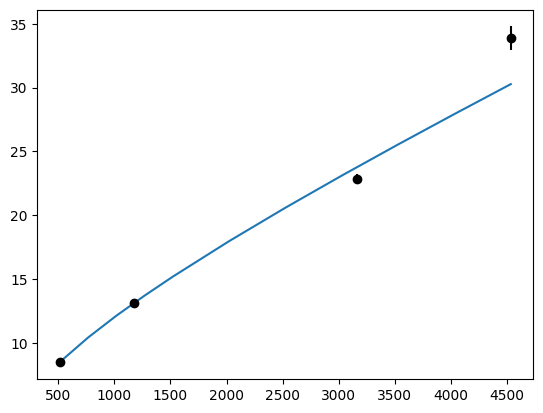

In [86]:
m.visualize()

In [69]:
?cost.BinnedNLL

In [73]:
?np.histogram

In [34]:
for i, area in enumerate(clicker.areas):
    print(i, np.mean(area.area.Y), area.area.sum())

0 3112.0 34916.0
1 3284.0 20822.0
2 2708.0 8045.0
3 2328.0 26082.0
4 696.0 29701.0
5 1156.0 1434313.0
6 2072.0 5464.0
7 1996.0 61859.0
8 1220.0 883151.0
9 1284.0 200130.0
10 2920.0 10501.0
11 2428.0 35729.0
12 1156.0 1312625.0
13 516.0 618113.0
14 4508.0 16765.0


<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Counts'>

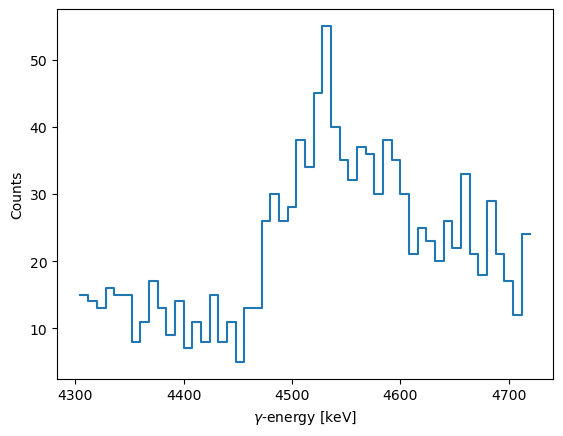

In [127]:
v = area.area.iloc[10, :]
v.plot()

<IPython.core.display.Javascript object>


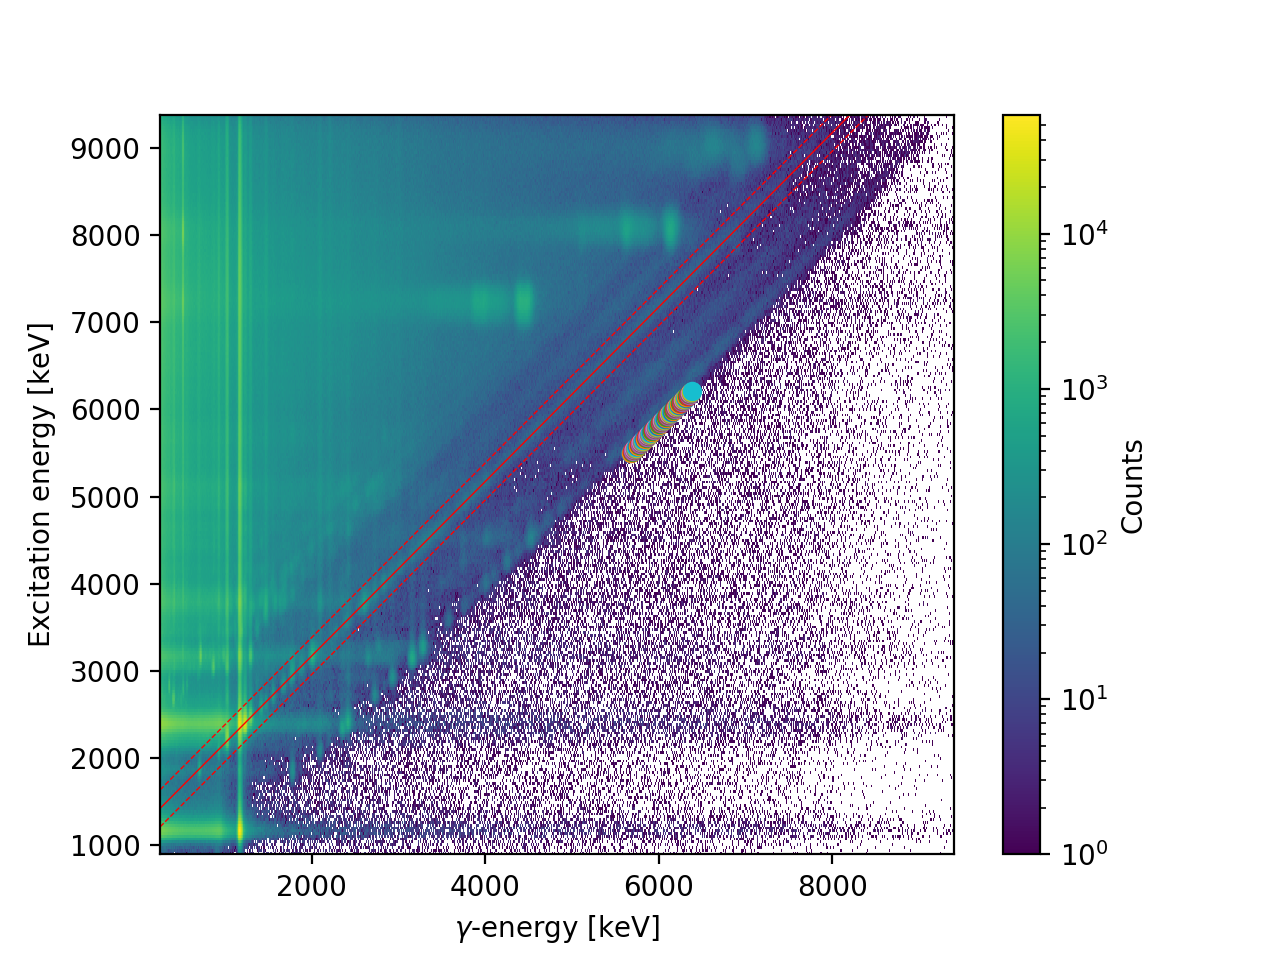

<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>

In [225]:
line = om.geometry.Line(slope=1, p1=(2000, 3175))
tline = om.geometry.ThickLine(line, 150)
ax, _ = mat.plot()
#line.plot(ax=ax, matrix=mat)
tline.plot(ax=ax, matrix=mat, lw=0.5)
#tline.upper.plot(ax=ax, matrix=mat, color='g')

<IPython.core.display.Javascript object>


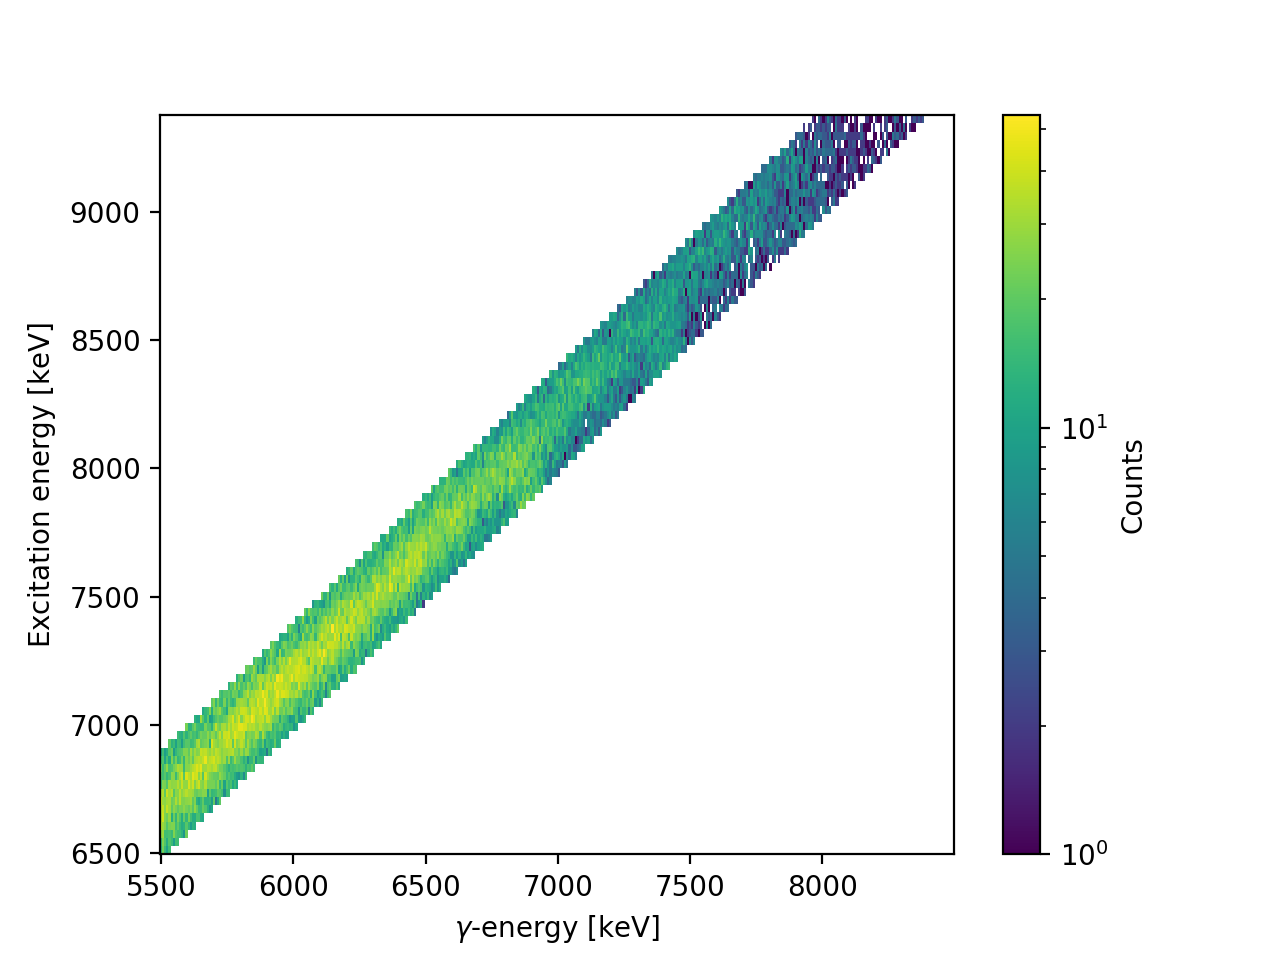

(<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f450e188a30>,
  <matplotlib.colorbar.Colorbar at 0x7f450e199f60>))

In [234]:
U = mat.copy()
U[~tline.within(U)] = 0
U = U.vloc[6500:, 5500:8500]
U.plot()

In [314]:
nrows, ncols = U.shape
As = np.asarray([U[row, :].sum() for row in range(nrows)])
mus = np.asarray([U.X[row]-1175 for row in range(nrows)])
X = U.Y
Ys = U.values

@njit
def sigma_model(x, a0, a1, a2):
    return 1/2.355*np.sqrt(a0 + a1*x + a2*x**2)

@njit
def gmat(a0, a1, a2):
    sigmas = sigma_model(mus, a0, a1, a2)
    G = np.zeros_like(Ys)
    for row in range(nrows):
        #ax.scatter((y-1175), (y))
        mu = mus[row]
        A = As[row]
        sigma = sigmas[row]
        gauss = A*norm.pdf(X, mu, sigma)
        G[row, :] = gauss
        
    return G

@njit
def cost(p):
    (a0, a1, a2), A = p[:3], p[3:]
    sigmas = sigma_model(mus, a0, a1, a2)
    cost = 0.0
    bad_sigma = False
    for row in range(nrows):
        #ax.scatter((y-1175), (y))
        mu = mus[row]
        #A = As[row]
        sigma = sigmas[row]
        gauss = A[row]*norm.pdf(X, mu, sigma)
        #G[row, :] = gauss
        cost += np.sum((gauss - Ys[row, :])**2)
        if sigma < 10 or sigma > 100:
            bad_sigma = True
    #if bad_sigma or sigmas[0] > sigmas[1]:
    #    cost *= 20
    return cost

p = np.array([60.63, 0.458, 2e-4, *As])
m = Minuit(cost, p)
m.limits[:3] = [(0, 70), (0, 10), (1e-4, 5e-4)]
m.limits[3:] = [(0, 1e3) for i in range(len(As))]
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.056e+06                  │             Nfcn = 16462             │
│ EDM = 0.000117 (Goal: 0.0002)    │            time = 5.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │     0     │    50     │            │            │    0    │   70    │       │
│ 1 │ x1   │  0.0000   │  0.0022   │            │            │    0    │   10    │       │
│ 2 │ x2   │  324e-6   │   6e-6    │            │            │ 0.0001  │ 0.0005  │       │
│ 3 │ x3   │   1.0e3   │   0.9e3   │            │            │    0    │  1000   │       │
│ 4 │ x4   │   1.0e3   │   0.8e3   │            │            │    0    │  1000   │       │
│ 5 │ x5   │   1.0e3   │   0.7e3   │            │            │    0    │  1000   │       │
│ 6 │ x6   │   1000    │    60     │            │            │    0    │  1000   │       │
│ 7 │ x7   │   1000    │    12     │            │            │    0    │  1000   │       │
│ 8 │ x8   │   1000    │     5     │            │            │    0    │  1000   │       │
│ 9 │ x9   │  1000.0   │    1.1    │            │            │    0    │  1000   │       │
│ 10│ x10  │  1000.0   │    2.8    │            │            │    0    │  1000   │       │
│ 11│ x11  │  1000.0   │    2.1    │            │            │    0    │  1000   │       │
│ 12│ x12  │  1000.0   │    1.8    │            │            │    0    │  1000   │       │
│ 13│ x13  │  1000.0   │    1.7    │            │            │    0    │  1000   │       │
│ 14│ x14  │  1000.0   │    1.7    │            │            │    0    │  1000   │       │
│ 15│ x15  │  1000.0   │    1.8    │            │            │    0    │  1000   │       │
│ 16│ x16  │  1000.0   │    1.9    │            │            │    0    │  1000   │       │
│ 17│ x17  │  1000.0   │    1.7    │            │            │    0    │  1000   │       │
│ 18│ x18  │  1000.0   │    1.5    │            │            │    0    │  1000   │       │
│ 19│ x19  │  1000.0   │    1.5    │            │            │    0    │  1000   │       │
│ 20│ x20  │  1000.0   │    1.5    │            │            │    0    │  1000   │       │
│ 21│ x21  │  1000.0   │    1.6    │            │            │    0    │  1000   │       │
│ 22│ x22  │  1000.0   │    1.5    │            │            │    0    │  1000   │       │
│ 23│ x23  │  1000.0   │    1.6    │            │            │    0    │  1000   │       │
│ 24│ x24  │  1000.0   │    1.5    │            │            │    0    │  1000   │       │
│ 25│ x25  │  1000.0   │    1.6    │            │            │    0    │  1000   │       │
│ 26│ x26  │  1000.0   │    1.7    │            │            │    0    │  1000   │       │
│ 27│ x27  │  1000.0   │    1.6    │            │            │    0    │  1000   │       │
│ 28│ x28  │  1000.0   │    1.7    │            │            │    0    │  1000   │       │
│ 29│ x29  │  1000.0   │    1.8    │            │            │    0    │  1000   │       │
│ 30│ x30  │  1000.0   │    1.6    │            │            │    0    │  1000   │   

<IPython.core.display.Javascript object>


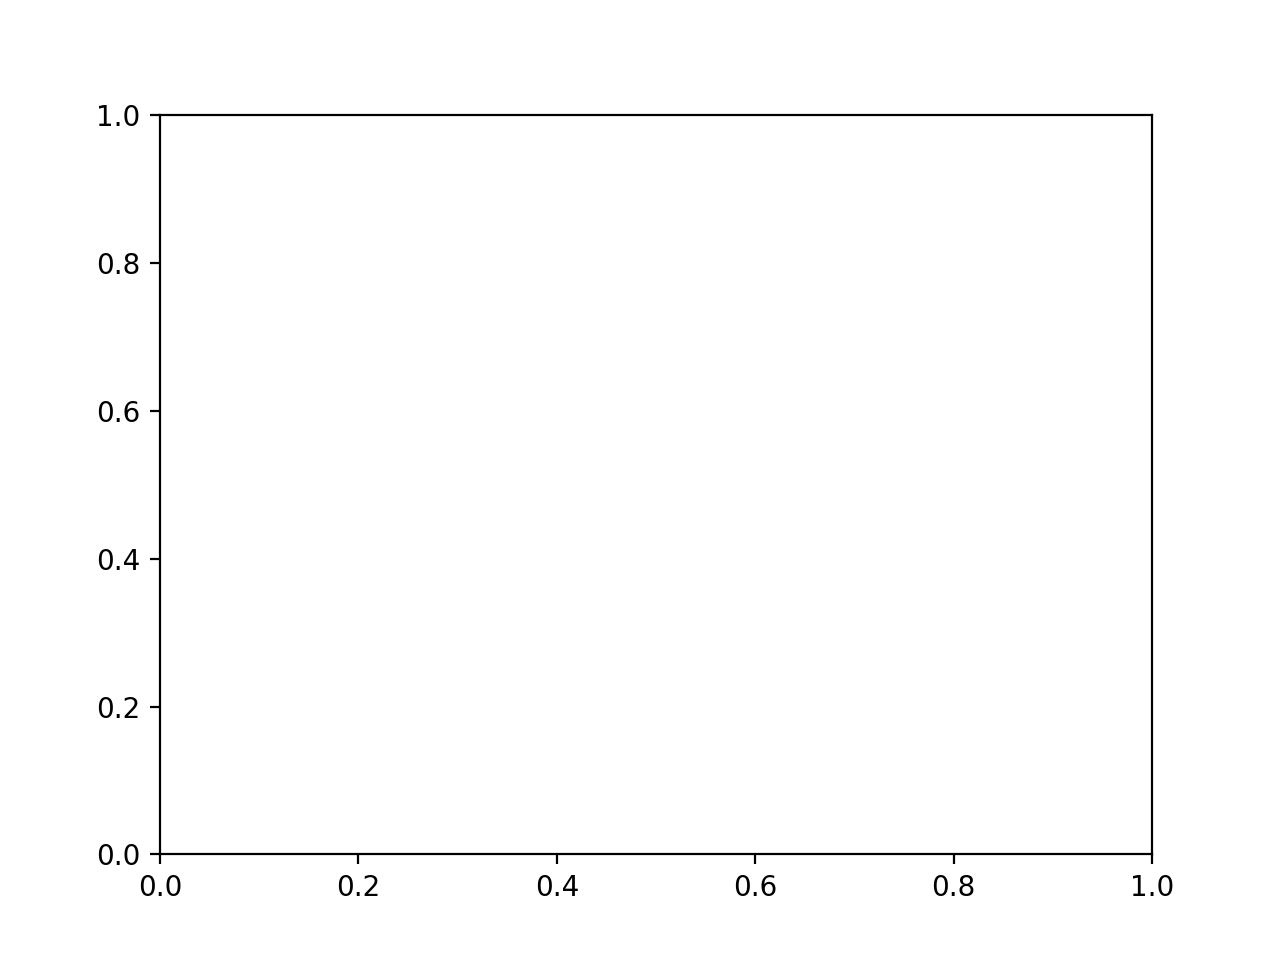

TypeError: too many arguments: expected 4, got 94

In [315]:
fig, ax = plt.subplots()
ax.plot(X, sigma_model(X, *m.values))

<IPython.core.display.Javascript object>


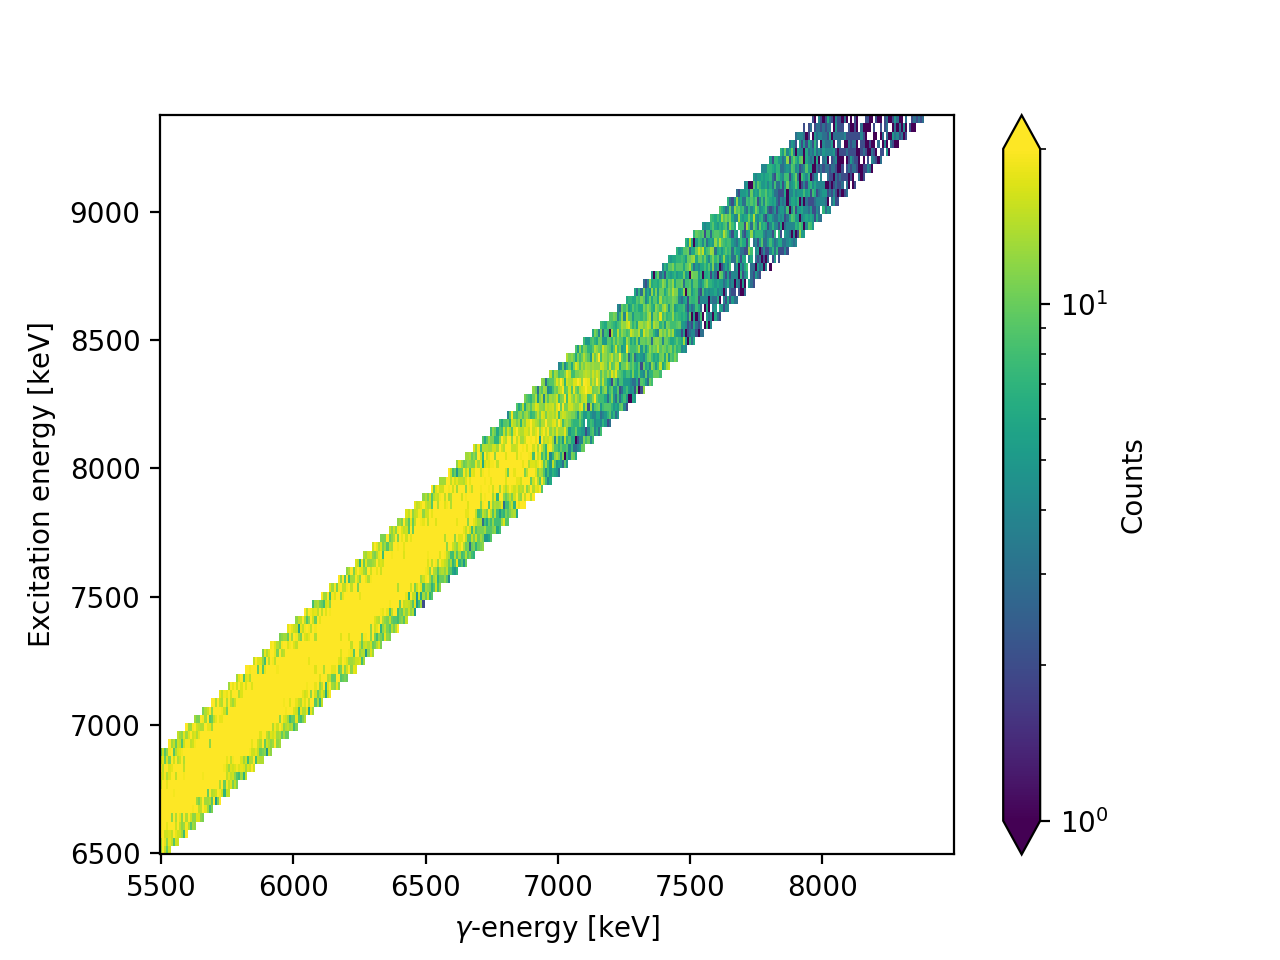

<IPython.core.display.Javascript object>


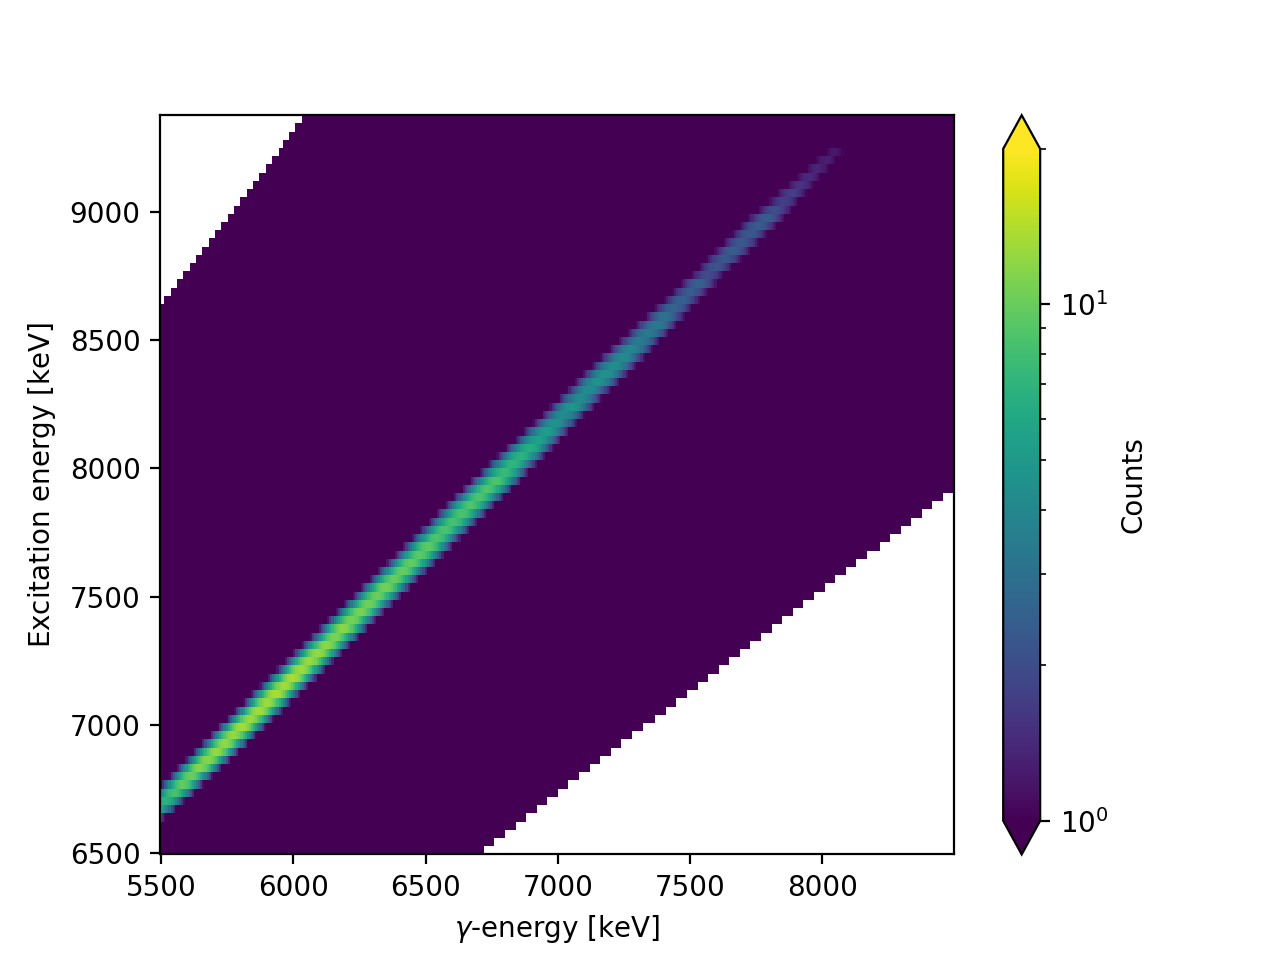

(<Axes: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f450dbdd870>,
  <matplotlib.colorbar.Colorbar at 0x7f4507af94b0>))

In [307]:
Gg = U.copy(values=gmat(*m.values))
ax, _ = U.plot(vmin=1, vmax=2e1)
Gg.plot(vmin=1, vmax=2e1)

In [295]:
?m.scan